<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install pandas scikit-learn seaborn scipy

In [98]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

In [99]:
df = pd.read_csv('/employee.csv')

In [100]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [102]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [103]:
# генерируем случайную последовательность
np.random.seed(11)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=10, replace=True), 'satisfaction_level'] = np.nan

In [104]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum())

satisfaction_level       10
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                    0
left                      0
dtype: int64


In [105]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [106]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.satisfaction_level = df_median.satisfaction_level.fillna(df_median.satisfaction_level.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [107]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.satisfaction_level = df_mean.satisfaction_level.fillna(df_median.satisfaction_level.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [108]:
np.random.seed(11)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=10, replace=True), 'salary'] = np.nan

print(df_test_nan.isnull().sum())

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                   10
left                      0
dtype: int64


In [109]:
# Вариант 4: Заполнение пропусков у качественного показателя
df_mode = df_test_nan.copy()
df_mode.salary = df_mode.salary.fillna(df_mode.salary.mode())

print("\n# Заполнение пропусков")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [110]:
df.salary.mode()

,salary
0,low


In [111]:
print(df.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object


In [112]:
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

satisfaction_level: 92 уникальных значений
last_evaluation: 65 уникальных значений
number_project: 6 уникальных значений
average_montly_hours: 215 уникальных значений
time_spend_company: 8 уникальных значений
Work_accident: 2 уникальных значений
promotion_last_5years: 2 уникальных значений
department: 10 уникальных значений
salary: 3 уникальных значений
left: 2 уникальных значений


In [115]:
print(df.satisfaction_level.min())
print(df.satisfaction_level.max())

0.09
1.0


In [116]:
df['happiness'] = np.where(df['satisfaction_level'] >= 0.7, 1, 0).astype(int)

In [117]:
Y = df['happiness'] # выбираем целевую переменную (категориальную)
X = df.drop('happiness', axis=1)
X = X.drop('satisfaction_level', axis=1)

In [118]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.53,2,157,3,0,0,1
1,0.86,5,262,6,0,0,1
2,0.88,7,272,4,0,0,1
3,0.87,5,223,5,0,0,1
4,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0,1
14995,0.48,2,160,3,0,0,1
14996,0.53,2,143,3,0,0,1
14997,0.96,6,280,4,0,0,1


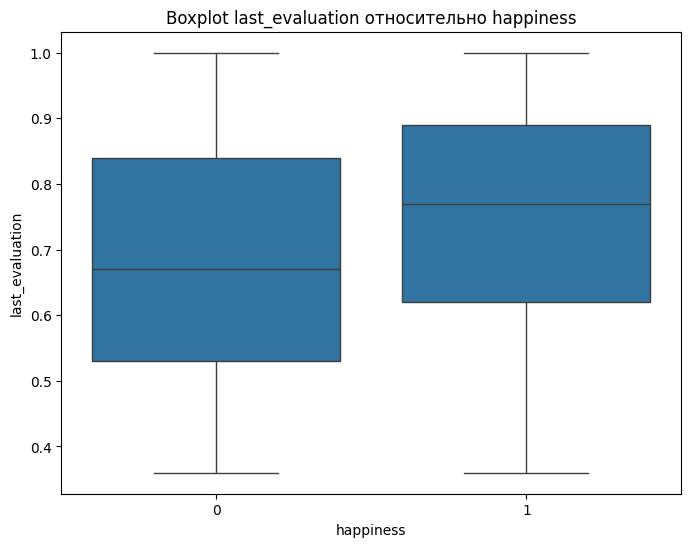

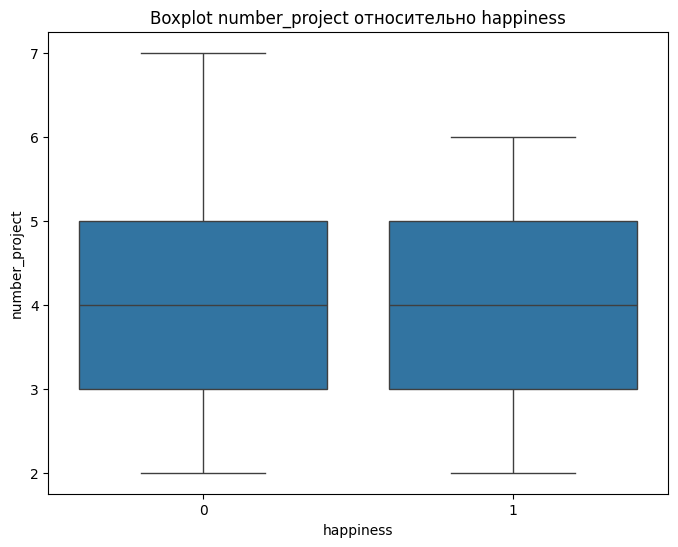

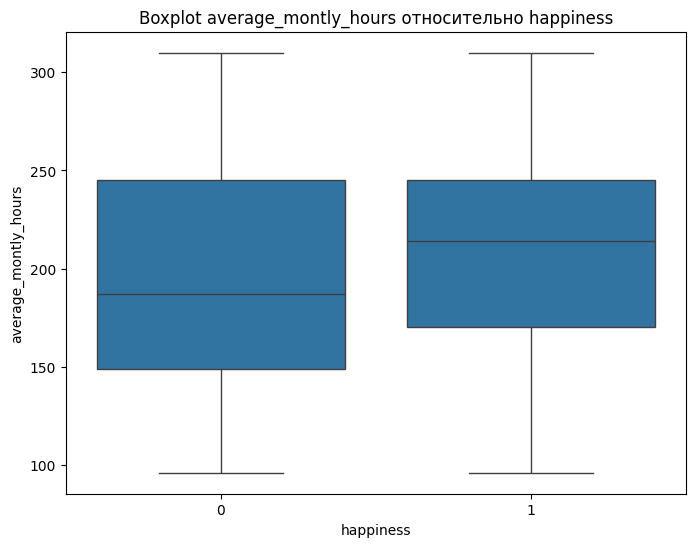

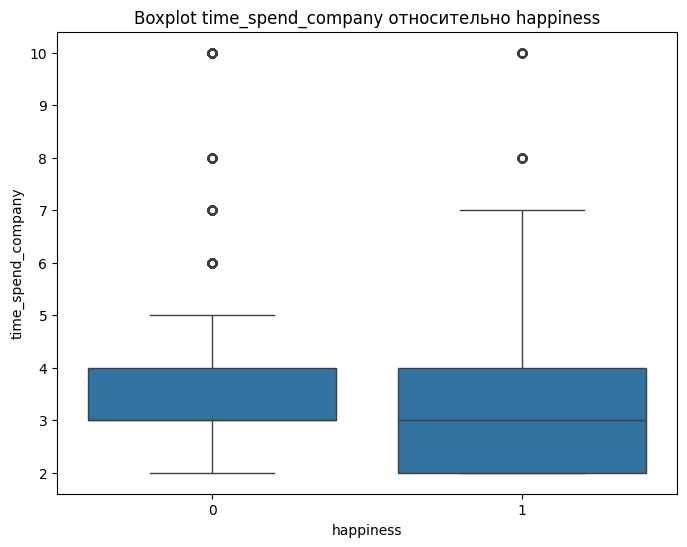

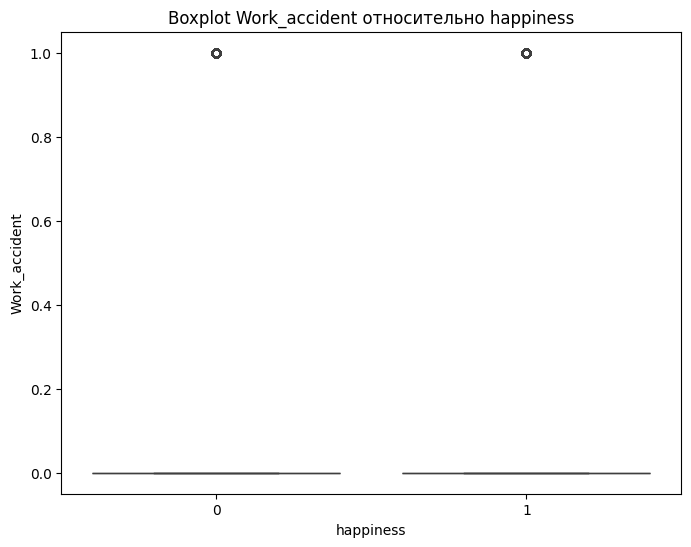

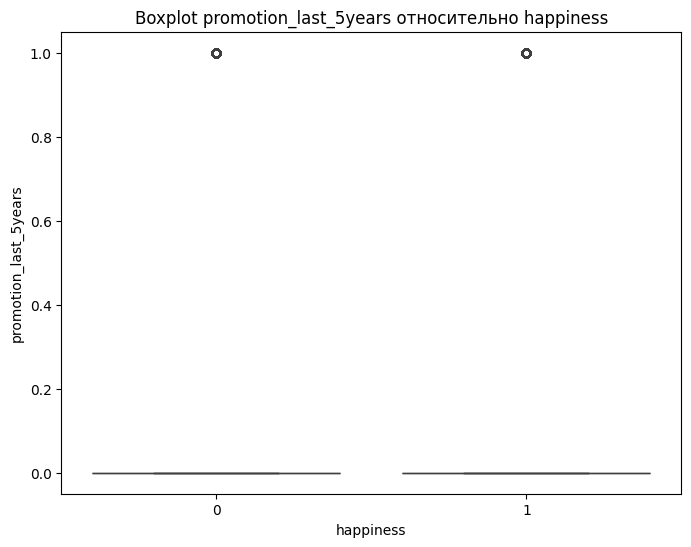

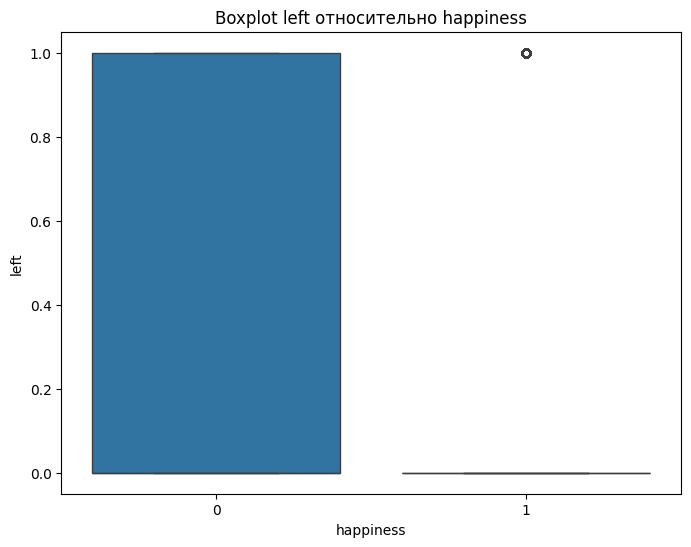

In [119]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='happiness', y=col, data=df)
    plt.title(f'Boxplot {col} относительно happiness')
    plt.show()

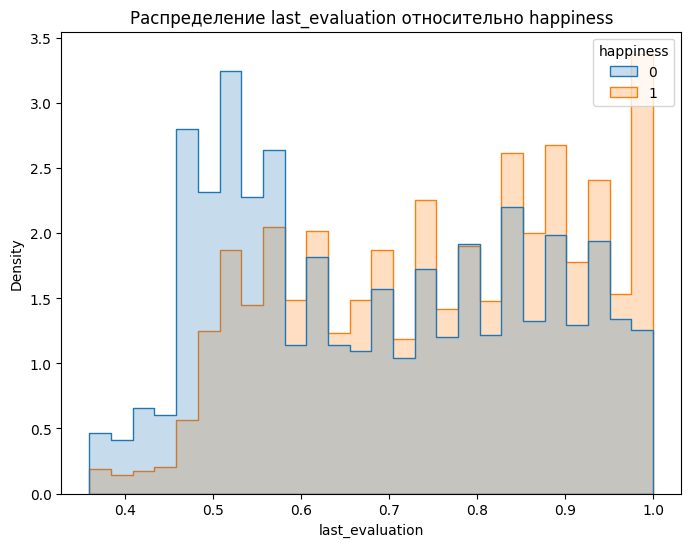

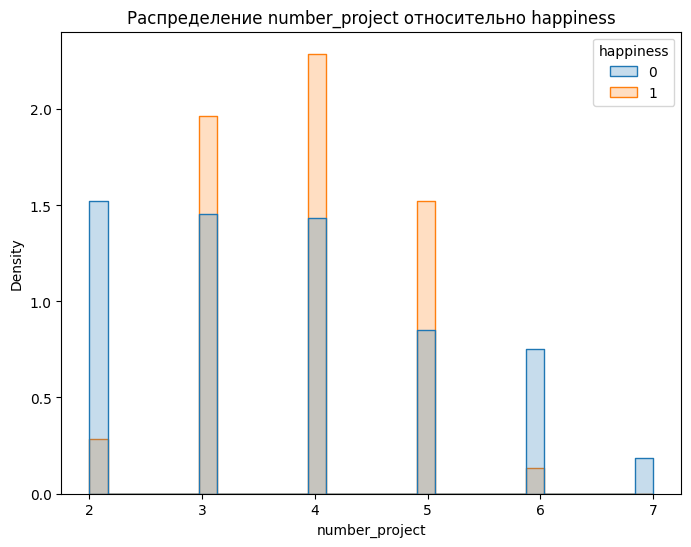

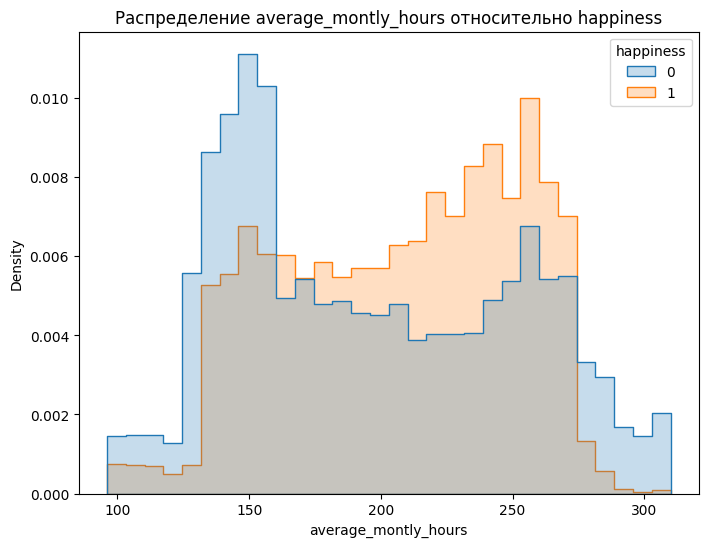

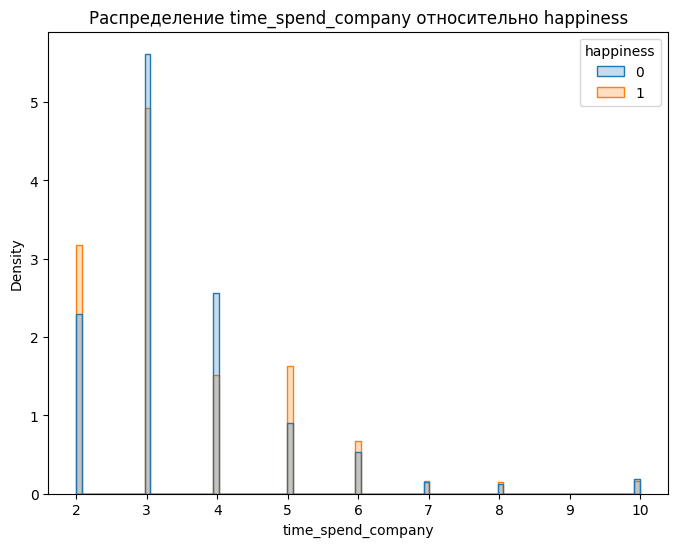

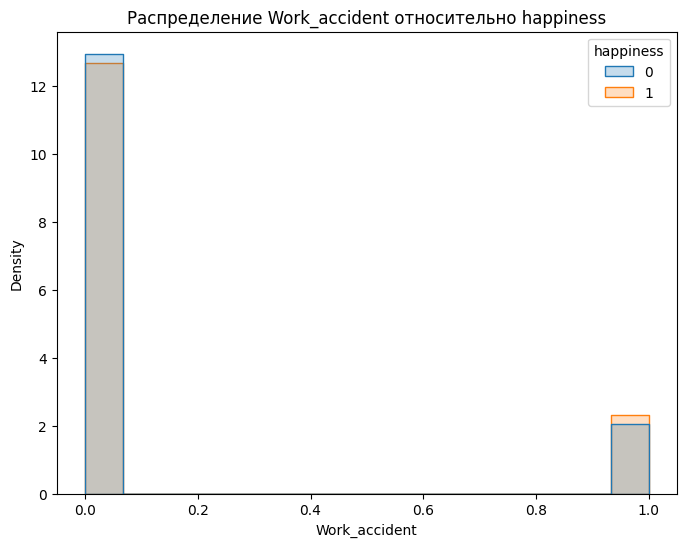

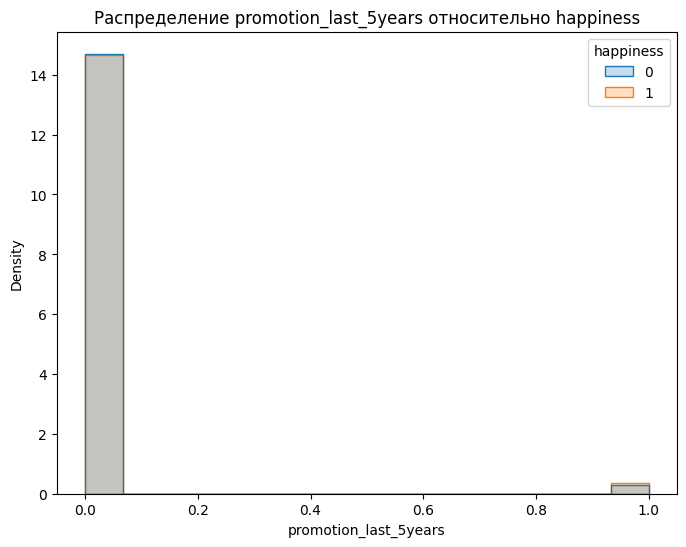

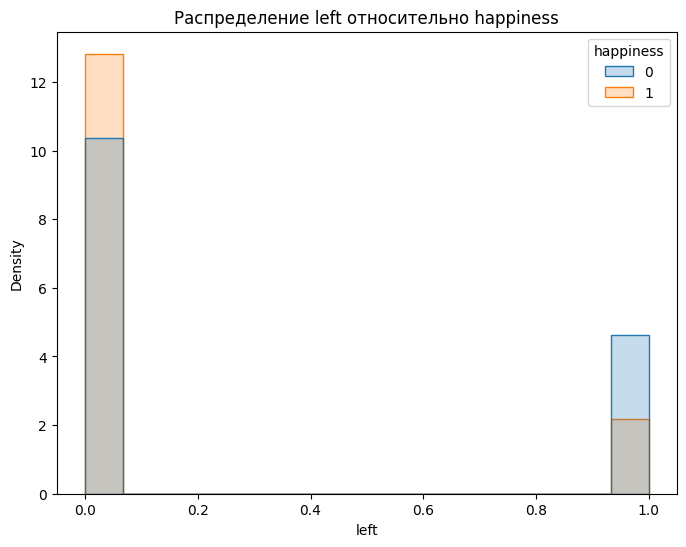

In [120]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='happiness', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно happiness')
    plt.show()

⏰ Что по ящикам с усами, что по распредению мы видим в основном незначительные различия для счастливых и несчатсливых сотрудников. Однако по показателям **last_evaluation, time_spend_company, average_montly_hours и left** есть значительные различия в медиане, количестве выбросов и квартильного размаха, а также по плотности распределения признака average_montly_hours можно судить о зависимости этих признаков. Более точные выводы сделаем после анализа результатов описательной статистики.

In [123]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('happiness')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('happiness')[df.select_dtypes(include=['object']).columns].describe()

In [124]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('happiness')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для last_evaluation:

            count      mean       std   min   25%   50%   75%  max
happiness                                                         
0          8496.0  0.686385  0.173019  0.36  0.53  0.67  0.84  1.0
1          6503.0  0.754925  0.160655  0.36  0.62  0.77  0.89  1.0


Описательная статистика для number_project:

            count      mean       std  min  25%  50%  75%  max
happiness                                                     
0          8496.0  3.743997  1.430608  2.0  3.0  4.0  5.0  7.0
1          6503.0  3.880209  0.905542  2.0  3.0  4.0  5.0  6.0


Описательная статистика для average_montly_hours:

            count        mean        std   min    25%    50%    75%    max
happiness                                                                 
0          8496.0  196.055909  53.455096  96.0  149.0  187.0  245.0  310.0
1          6503.0  207.575427  44.103027  96.0  170.0  214.0  245.0  310.0


Описательная статистика для time

In [125]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary                  
               count unique    top  freq  count unique  top  freq
happiness                                                        
0               8496     10  sales  2314   8496      3  low  4216
1               6503     10  sales  1826   6503      3  low  3100

⏰**Оценка на последней аттестации (last_evaluation):**

*   Счастливые сотрудники (happiness = 1) имеют более высокую среднюю оценку аттестации (0.755) по сравнению с несчастливыми (0.686).
*   Медиана выше у счастливых (0.77 против 0.67), что подтверждает, что в целом они показывают лучшие результаты на аттестациях.

**Количество проектов (number_project):**

*   Счастливые сотрудники выполняют в среднем чуть больше проектов (3.88) по сравнению с несчастливыми (3.74).
*   Разброс в количестве проектов больше среди несчастливых сотрудников, что может указывать на несбалансированность нагрузки.

**Среднее количество рабочих часов в месяц (average_monthly_hours):**

*   Счастливые сотрудники работают в среднем больше (207.6 часов против 196.1 часов у несчастливых).
*   Разброс в показателе рабочего времени меньше у счастливых, что может свидетельствовать о более равномерной нагрузке.

**Стаж работы в компании (time_spend_company):**

*   Средний стаж работы практически одинаков для обеих групп (около 3.5 лет).

**Несчастные случаи на работе (Work_accident):**

*  Процент сотрудников, попавших в несчастные случаи, немного выше среди счастливых (15.45% против 13.7%).Это может указывать на то, что удовлетворенность работой не зависит напрямую от риска получения травм.

**Повышение за последние 5 лет (promotion_last_5years):**

*   Счастливые сотрудники чуть чаще получают повышение (2.37% против 1.94%)

**Уволенные сотрудники (left):**

*   Процент уволенных значительно выше среди несчастливых сотрудников (30.93% против 14.5% у счастливых). Показатель свидетельствует о том, что уровень удовлетворенности сотрудников может быть связан с решением покинуть компанию.

**Отдел (department):**

*   Самым многочисленным отделом является отдел продаж, среди как счастливых, так и несчастливых сотрудников большая доля именно из этого подразделения.
*   Процент счастливых и несчастливых людей, работающих в нем, примерно одинаков - 28% и 27% соответственно.

**Заработная плата (salary):**

*   Большинство сотрудников получают низкую заработную плату.
*   Среди счастливых работников низкую зарплату получают 47.7%, среди несчастливых - 49.6%.

**Общий вывод:**

Счастливые сотрудники, как правило, имеют более высокие оценки на аттестациях, работают больше, но при этом у них более равномерная нагрузка. Они чаще получают повышение, реже покидают компанию. Большая часть сотрудников работает в отделе продаж, соотношение в нем счастливых и несчастливых сотрудников примерно одинаковое. Сотрудники с низкой зарплатой составляют значительную долю как среди счастливых, так и среди несчастливых сотрудников.

In [126]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,happiness
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,0.804343
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.198443
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.054766
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.114308
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,-0.003963
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.024712
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,0.014634
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.191185
happiness,0.804343,0.198443,0.054766,0.114308,-0.003963,0.024712,0.014634,-0.191185,1.000000


⏰**Уровень удовлетворенности:**

*  **happiness:** Как и следовало ожидать, сильная корреляция между признаками (0,8) свидетельствует о том, что чем выше уровень удовлетворенности, тем выше вероятность того, что сотрудник будет счастлив.

*   **left:** Умеренная обратная корреляция (-0,39) свидетельствует о том, что чем ниже удовлетворенность, тем выше вероятность того, что сотрудник покинет компанию.

**Последняя аттестация:**

* **number_project:** Умеренная положительная корреляция (0,35), можно судить о том, что сотрудник, имеющий больше проектов в работе, более компетентен.

*   **average_montly_hours:** Аналогично, присутствует умеренная положительная корреляция (0,34). Можно сделать общий вывод, что те сотрудники, которые имеют больше проектов и которые в среднем проводят больше времени на работе, более компетентны и имеют больше возможностей для оценки своих навыков.

*   **left:** Практически отсутствует корреляция (0,007). Следовательно, оценка последней аттестации не влияет на увольнение сотрудника.

**Количество проектов:**

*   **average_montly_hours:** Умеренная положительная корреляция (0,42) свидетельствует, что большое количество проектов требует больше времени у сотрудника для их реализации.

*   **Work_accident:**  Корреляция практически отсутствует (-0,005), значит, количество проектов в работе не влияет на травматизацию сотрудника.

**Среднее количество рабочих часов в месяц:**

*   **promotion_las_5years:** Корреляция практически отсутствует (-0,004), среднее количество рабочих часов сотрудника не влияет на его повышение.

**Стаж работы:**

*   **Work_accident:** Практически отстутсвует корреляция (0,002), это говорит о том, что стаж не влияет на количество проишествий во время работы.

*   **happiness:** Аналогично предыдущему пункту - (-0,004), зависимость счастья сотрудника от его стажа работы не выявлена.

При дальнейшем анализе можно исключить показатели Work_accident и promotion_last_5years.

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [290]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['department', 'salary']


In [291]:
# Создаем копию данных
X_processed = X.copy()

# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#X_processed['salary'] = le.fit_transform(X_processed['salary'])

# Считаем частоту каждого департамента
#department_counts = X_processed['department'].value_counts()

# Заменяем категории департамента на их частоту
#X_processed['department'] = X_processed['department'].map(department_counts)

In [292]:
X_processed

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.53,2,157,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.86,5,262,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.88,7,272,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.87,5,223,5,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.52,2,159,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.48,2,160,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.53,2,143,3,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.96,6,280,4,0,0,1,False,False,False,False,False,False,False,True,False,True,False


In [293]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']


In [294]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [281]:
X_processed = X_processed.drop(columns=['Work_accident', 'promotion_last_5years'])

In [295]:
X_processed

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.265625,0.0,0.285047,0.125,0.0,0.0,1.0,False,False,False,False,False,False,True,False,False,True,False
1,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0,False,False,False,False,False,False,True,False,False,False,True
2,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0,False,False,False,False,False,False,True,False,False,False,True
3,0.796875,0.6,0.593458,0.375,0.0,0.0,1.0,False,False,False,False,False,False,True,False,False,True,False
4,0.250000,0.0,0.294393,0.125,0.0,0.0,1.0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.328125,0.0,0.257009,0.125,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,True,False
14995,0.187500,0.0,0.299065,0.125,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,True,False
14996,0.265625,0.0,0.219626,0.125,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,True,False
14997,0.937500,0.8,0.859813,0.250,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,True,False


In [296]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [297]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.5805
Точность на тестовой выборке: 0.5723

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1699
           1       0.51      0.43      0.46      1301

    accuracy                           0.57      3000
   macro avg       0.56      0.56      0.55      3000
weighted avg       0.57      0.57      0.57      3000



In [298]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                   Feature  Coefficient
0          last_evaluation     1.486989
6                     left    -1.118321
2     average_montly_hours     0.748186
8    department_accounting    -0.251783
17           salary_medium     0.137829
16              salary_low     0.129879
1           number_project    -0.128905
9            department_hr    -0.107463
10   department_management    -0.078245
15    department_technical    -0.066135
5    promotion_last_5years     0.054588
11    department_marketing    -0.050233
12  department_product_mng    -0.026941
4            Work_accident    -0.020607
7         department_RandD     0.020589
3       time_spend_company     0.018860
13        department_sales     0.016586
14      department_support     0.001663


In [299]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.5679
Отклонение точности: 0.0434


In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

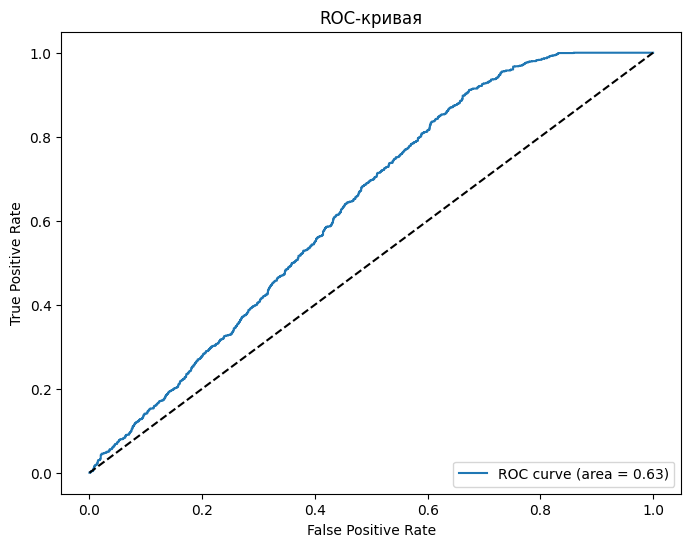

In [304]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()